<a href="https://colab.research.google.com/github/Pavanahobilam/pavan/blob/main/AI_PS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Data Sample:
                         time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Confusion Matrix:
 [[3353    0]
 [   0  170]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3353
           1       1.00      1.00      1.00       170

    accuracy                           1.00      3523
   macro avg       1.00      1.00      1.00      3523
weighted avg       1.00      1.00      1.00      3523



Text(50.72222222222221, 0.5, 'Actual')

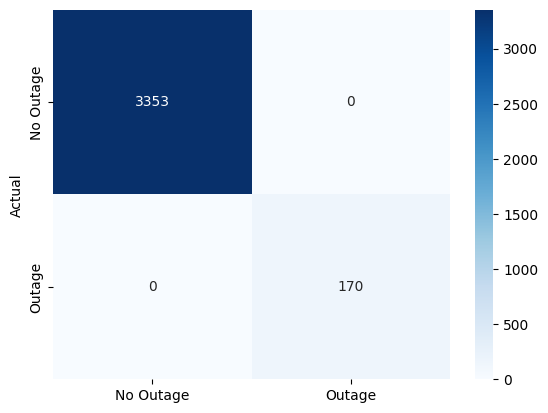

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/energy-consumption-generation-prices-and-weather.csv'
data = pd.read_csv(file_path)

# Display first few rows to understand structure
print("Initial Data Sample:\n", data.head())
print("\nColumns:", data.columns)

# Convert 'time' to datetime and extract features if needed
data['time'] = pd.to_datetime(data['time'], utc=True)
data['hour'] = data['time'].dt.hour
data['day_of_week'] = data['time'].dt.dayofweek
data['month'] = data['time'].dt.month

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define target variable - Assume 'outage' based on 'total load actual'
data['outage'] = np.where(data['total load actual'] > data['total load actual'].quantile(0.95), 1, 0)

# Drop irrelevant columns (modify as needed)
drop_columns = ['price day ahead', 'price actual', 'time']  # Dropping 'time' if not used
data.drop(columns=drop_columns, inplace=True, errors='ignore')

# Define features (X) and target (y)
X = data.drop(columns=['outage'])
y = data['outage']

# Verify dataset size
print("\nFeature Shape:", X.shape, "Target Shape:", y.shape)

# Split into training & testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (scale to mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Outage', 'Outage'], yticklabels=['No Outage', 'Outage'])
plt.ylabel('Actual')

Sample of synthetic power distribution data:
   power_consumption     voltage    current
0                202  232.732886  15.071370
1                535  231.096312  17.142950
2                960  221.820042  16.499842
3                370  234.527941   7.245560
4                206  230.948926  11.359172


<Figure size 1500x1000 with 0 Axes>

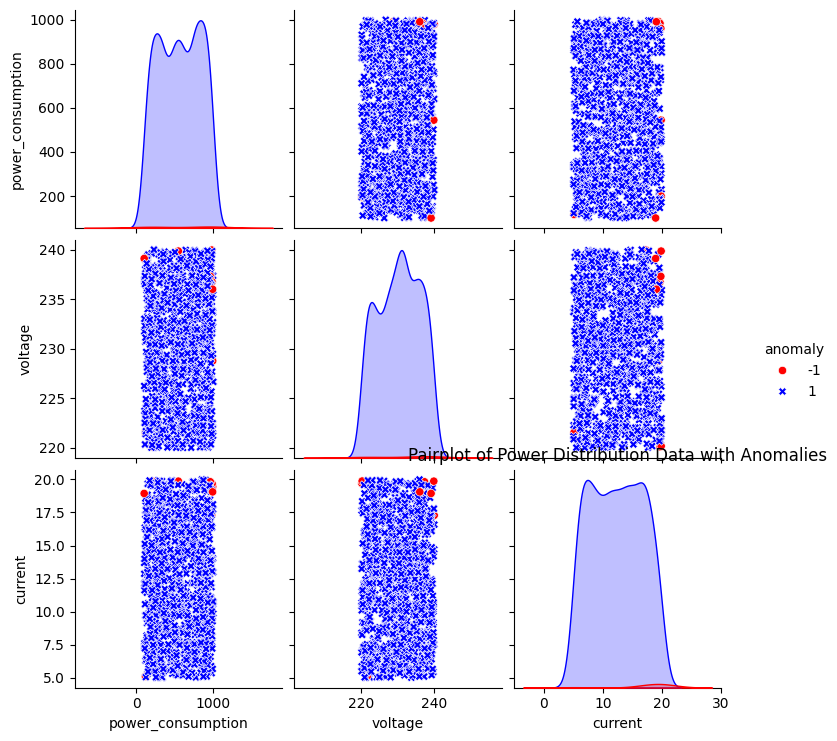

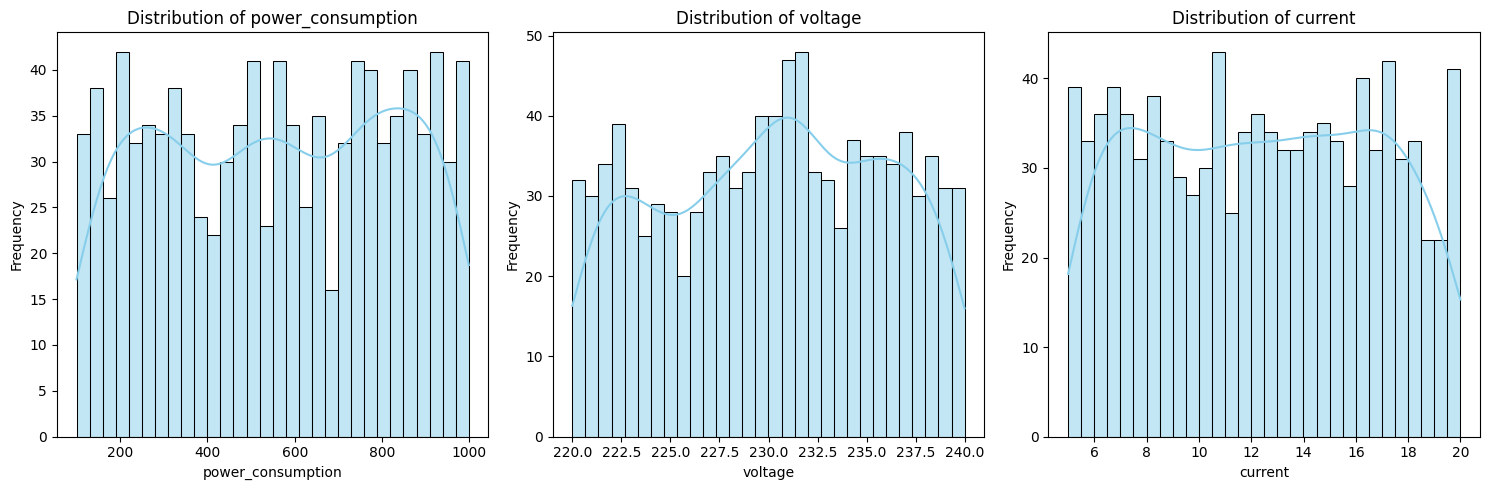

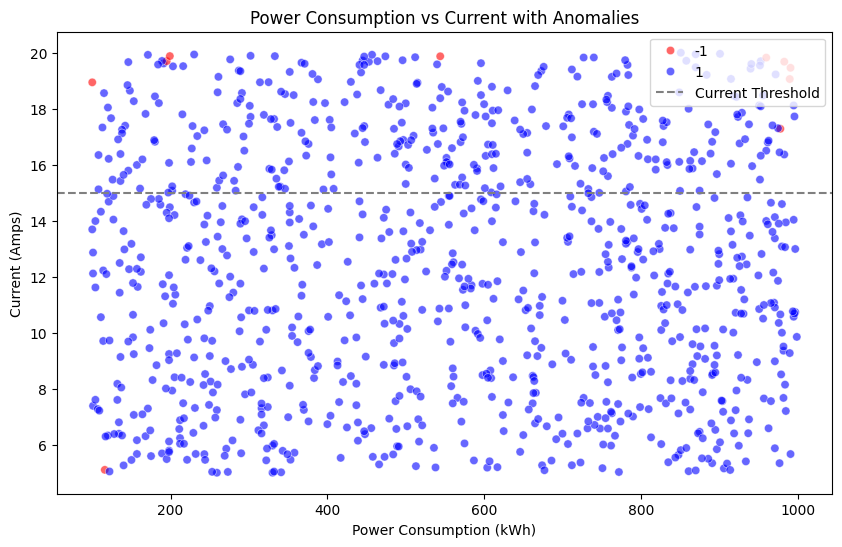

Suspicious activity detected. Potential power theft cases found.
Power theft cases:
     power_consumption     voltage    current  anomaly
110                978  239.945111  17.281025       -1
177                991  228.774894  19.457334       -1
292                983  236.731296  19.675959       -1
424                116  221.555307   5.105438       -1
563                195  220.101643  19.696737       -1
578                960  237.289858  19.820983       -1
609                199  220.181448  19.876139       -1
793                544  239.842666  19.868948       -1
952                100  239.093201  18.938861       -1
973                990  235.995622  19.056365       -1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generate synthetic power distribution data
np.random.seed(42)
num_samples = 1000

# Simulated power consumption in kWh
power_consumption = np.random.randint(100, 1000, size=num_samples)

# Simulated voltage in volts
voltage = np.random.uniform(220, 240, size=num_samples)

# Simulated current in amps
current = np.random.uniform(5, 20, size=num_samples)

# Create DataFrame
power_data = pd.DataFrame({
    'power_consumption': power_consumption,
    'voltage': voltage,
    'current': current
})

# Display a sample of the synthetic data
print("Sample of synthetic power distribution data:")
print(power_data.head())

# Write synthetic data to a CSV file
power_data.to_csv('synthetic_power_distribution_data.csv', index=False)

# Load data from CSV
data = pd.read_csv('synthetic_power_distribution_data.csv')

# Preprocessing
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model initialization
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination based on your data

# Model fitting
model.fit(X_scaled)

# Predictions
predictions = model.predict(X_scaled)

# Add predictions to original DataFrame
data['anomaly'] = predictions

# Filter out the anomalies for further investigation
power_theft_cases = data[data['anomaly'] == -1]

# Visualization
plt.figure(figsize=(15, 10))

# 1. Pairplot of the data
sns.pairplot(data, hue='anomaly', palette={1: 'blue', -1: 'red'}, markers=["o", "X"])
plt.title('Pairplot of Power Distribution Data with Anomalies')
plt.show()

# 2. Histograms of each feature
plt.figure(figsize=(15, 5))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Scatter plot of power consumption vs current
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='power_consumption', y='current', hue='anomaly', palette={1: 'blue', -1: 'red'}, alpha=0.6)
plt.title('Power Consumption vs Current with Anomalies')
plt.xlabel('Power Consumption (kWh)')
plt.ylabel('Current (Amps)')
plt.axhline(y=15, color='gray', linestyle='--', label='Current Threshold')
plt.legend()
plt.show()

# Check if there are any potential power theft cases
if len(power_theft_cases) > 0:
    print("Suspicious activity detected. Potential power theft cases found.")
    print("Power theft cases:")
    print(power_theft_cases)
else:
    print("No suspicious activity detected. Power distribution is normal.")

Generating and forecasting energy demand...
Synthetic energy demand data saved as 'synthetic_energy_demand.csv'


<ipython-input-4-988270550d70>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n0gv7a0/3leeye3y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n0gv7a0/uhv1a8iu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14384', 'data', 'file=/tmp/tmp8n0gv7a0/3leeye3y.json', 'init=/tmp/tmp8n0gv7a0/uhv1a8iu.json', 'output', 'file=/tmp/tmp8n0gv7a0/prophet_modelp930qf97/prophet_model-20250407113749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:37:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:37:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


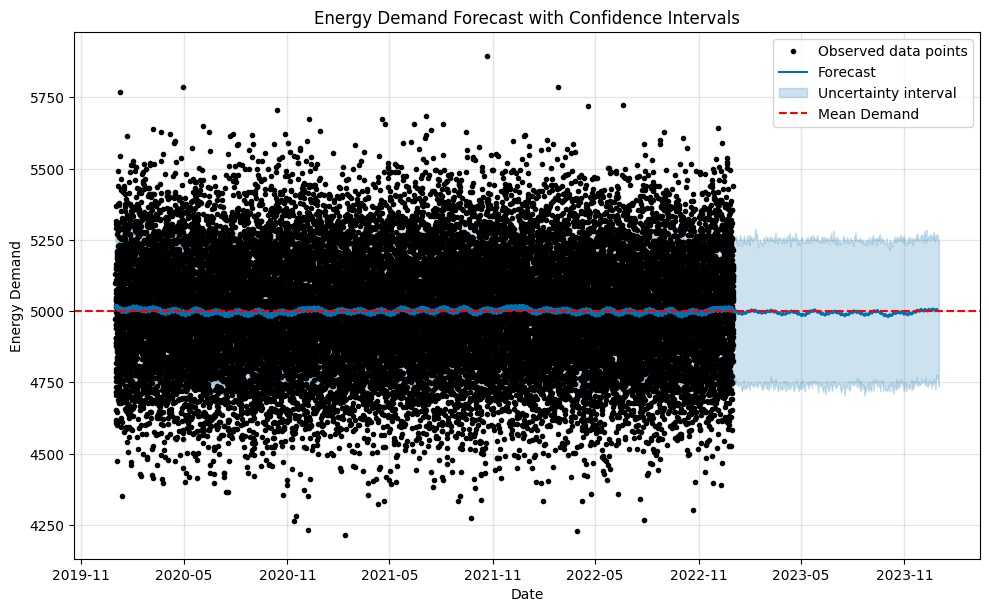

Generating and forecasting renewable energy output...


<ipython-input-4-988270550d70>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


526/526 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - loss: 2742188.0000 - val_loss: 2701038.0000
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 2646152.5000 - val_loss: 2614595.0000
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 2548049.5000 - val_loss: 2530648.5000
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 2478349.0000 - val_loss: 2448744.0000
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - loss: 2395091.5000 - val_loss: 2368597.2500
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 2317461.7500 - val_loss: 2290109.2500
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 2230385.2500 - val_loss: 2213177.7500
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 2156674.5000 - val_loss: 2137779.5000
Epoch 9/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - loss: 2074003.1250 - val_loss: 2063803.1250
Epoch 10/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 2017571.2500 - val_loss: 1991326.2500
Epoch 11/2

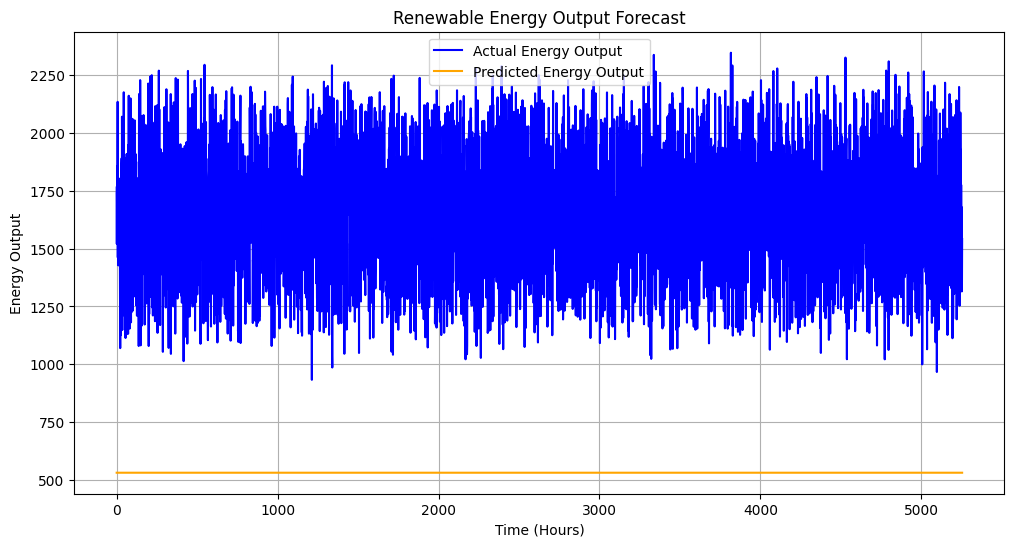

Detecting energy theft...
Detecting energy theft...
[[2668   44]
 [  36  252]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2712
           1       0.85      0.88      0.86       288

    accuracy                           0.97      3000
   macro avg       0.92      0.93      0.92      3000
weighted avg       0.97      0.97      0.97      3000



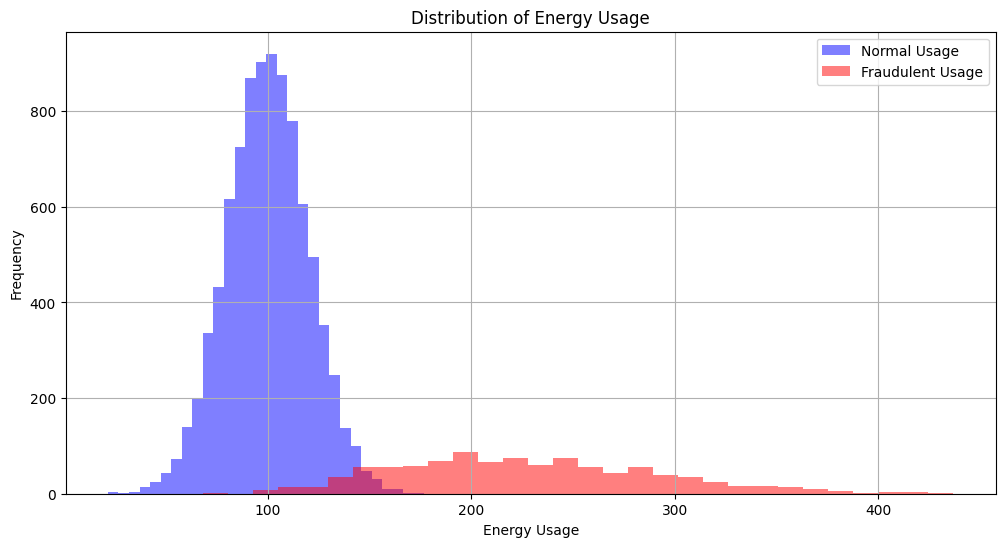

Fraud Predictions: [1 1 0 1]


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet


# Generate synthetic energy demand data
def generate_synthetic_energy_demand():
    dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
    np.random.seed(42)
    energy_demand = 5000 + np.random.normal(0, 200, len(dates))
    data = pd.DataFrame({'ds': dates, 'y': energy_demand})
    data.to_csv('/content/synthetic_energy_demand.csv', index=False)
    print("Synthetic energy demand data saved as 'synthetic_energy_demand.csv'")
    return data


# Generate synthetic renewable energy output data
def generate_synthetic_renewable_energy_output():
    dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
    np.random.seed(42)
    wind_speed = np.random.uniform(0, 25, len(dates))
    temperature = np.random.uniform(-10, 35, len(dates))
    sunlight = np.random.uniform(0, 1, len(dates))
    humidity = np.random.uniform(0, 100, len(dates))
    energy_output = 1000 + wind_speed * 30 + temperature * 2 + sunlight * 500 + np.random.normal(0, 50, len(dates))
    data = pd.DataFrame({
        'date': dates,
        'wind_speed': wind_speed,
        'temperature': temperature,
        'sunlight': sunlight,
        'humidity': humidity,
        'energy_output': energy_output
    })
    data.to_csv('/content/synthetic_renewable_energy_output.csv', index=False)
    print("Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'")
    return data


# Forecasting energy demand with Facebook Prophet
def forecast_energy_demand(data):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=365)  # Forecasting for the next year
    forecast = model.predict(future)

    # Plotting with confidence intervals
    fig = model.plot(forecast)
    plt.title('Energy Demand Forecast with Confidence Intervals')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.axhline(y=data['y'].mean(), color='r', linestyle='--', label='Mean Demand')
    plt.legend()
    plt.show()


# Prepare the data for LSTM
def create_sequences(data, target, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:i + sequence_length]
        y = target[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)


# Forecasting renewable energy output with LSTM
def forecast_renewable_energy_output(data):
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    features = data[['wind_speed', 'temperature', 'sunlight', 'humidity']]
    target = data['energy_output']

    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)

    sequence_length = 30  # 30 hours sequence
    X, y = create_sequences(scaled_features, target.values, sequence_length)

    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

    loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {loss}')

    predictions = model.predict(X_test)

    # Plotting actual vs predicted energy output
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Energy Output', color='blue')
    plt.plot(predictions, label='Predicted Energy Output', color='orange')
    plt.title('Renewable Energy Output Forecast')
    plt.xlabel('Time (Hours)')
    plt.ylabel('Energy Output')
    plt.legend()
    plt.grid()
    plt.show()


# Generate synthetic data for energy theft detection
def generate_synthetic_data(num_samples=10000):
    np.random.seed(42)
    customer_ids = np.arange(1, num_samples + 1)

    # Generate normal usage patterns
    normal_usage = np.random.normal(loc=100, scale=20, size=num_samples)

    # Introduce some fraudulent patterns
    fraud_percentage = 0.1
    num_fraud = int(fraud_percentage * num_samples)
    fraud_indices = np.random.choice(num_samples, num_fraud, replace=False)
    fraud_usage = normal_usage[fraud_indices] * np.random.uniform(1.5, 3.0, num_fraud)  # 50% to 200% more usage

    # Combine normal and fraudulent usage
    usage = normal_usage.copy()
    usage[fraud_indices] = fraud_usage

    # Create DataFrame
    data = pd.DataFrame({
        'customer_id': customer_ids,
        'energy_usage': usage,
        'is_fraud': [1 if i in fraud_indices else 0 for i in range(num_samples)]
    })

    return data


# Load and prepare the data
def load_and_prepare_data():
    # Load the synthetic data
    data = generate_synthetic_data()

    # Generate additional features
    data['usage_deviation'] = np.abs(data['energy_usage'] - data['energy_usage'].mean())
    data['high_usage'] = (data['energy_usage'] > data['energy_usage'].quantile(0.95)).astype(int)

    return data


# Train the model to detect energy theft
def train_model(data):
    # Prepare the feature matrix X and target vector y
    X = data[['energy_usage', 'usage_deviation', 'high_usage']]
    y = data['is_fraud']

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Visualize the distribution of energy usage
    plt.figure(figsize=(12, 6))
    plt.hist(data[data['is_fraud'] == 0]['energy_usage'], bins=30, alpha=0.5, label='Normal Usage', color='blue')
    plt.hist(data[data['is_fraud'] == 1]['energy_usage'], bins=30, alpha=0.5, label='Fraudulent Usage', color='red')
    plt.title('Distribution of Energy Usage')
    plt.xlabel('Energy Usage')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

    return model


# Function to detect fraud in new data
def detect_fraud(model, new_data):
    predictions = model.predict(new_data)
    return predictions


def main():
    # Generate and forecast energy demand
    print("Generating and forecasting energy demand...")
    energy_demand_data = generate_synthetic_energy_demand()
    forecast_energy_demand(energy_demand_data)

    # Generate and forecast renewable energy output
    print("Generating and forecasting renewable energy output...")
    renewable_energy_data = generate_synthetic_renewable_energy_output()
    forecast_renewable_energy_output(renewable_energy_data)

    # Detect energy theft
    print("Detecting energy theft...")
        # Detect energy theft
    print("Detecting energy theft...")
    data = load_and_prepare_data()
    model = train_model(data)

    # Example new data (Replace with actual new data for real use case)
    new_data = pd.DataFrame({
        'energy_usage': [150, 250, 90, 300],  # Example values
        'usage_deviation': [10, 20, 5, 30],  # Example values
        'high_usage': [1, 1, 0, 1]  # Example values
    })

    # Detect fraud in new data
    fraud_predictions = detect_fraud(model, new_data)
    print(f"Fraud Predictions: {fraud_predictions}")


if __name__ == "__main__":
    main()

<ipython-input-4-988270550d70>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')
<ipython-input-4-988270550d70>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2020-01-01', end='2023-01-01', freq='H')


Synthetic energy demand data saved as 'synthetic_energy_demand.csv'
Synthetic renewable energy output data saved as 'synthetic_renewable_energy_output.csv'
Forecasting Energy Demand:


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n0gv7a0/dd7_aac9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8n0gv7a0/kzn9hn_t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36114', 'data', 'file=/tmp/tmp8n0gv7a0/dd7_aac9.json', 'init=/tmp/tmp8n0gv7a0/kzn9hn_t.json', 'output', 'file=/tmp/tmp8n0gv7a0/prophet_modelk2zzo2xi/prophet_model-20250407114453.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:44:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:44:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


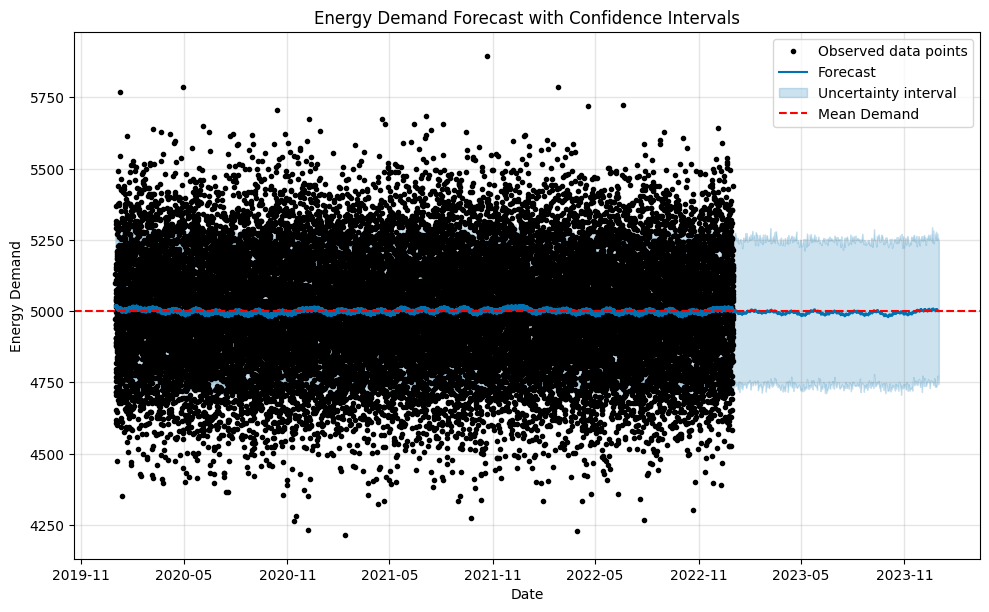

Forecasting Renewable Energy Output:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 26s 38ms/step - loss: 2747089.0000 - val_loss: 2703338.7500
Epoch 2/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 2642889.5000 - val_loss: 2616801.7500
Epoch 3/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 2563180.2500 - val_loss: 2532878.0000
Epoch 4/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - loss: 2475527.5000 - val_loss: 2450896.7500
Epoch 5/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 2392395.7500 - val_loss: 2370697.5000
Epoch 6/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 2327302.5000 - val_loss: 2292176.5000
Epoch 7/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 2234880.2500 - val_loss: 2215233.2500
Epoch 8/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 2168454.7500 - val_loss: 2139771.7500
Epoch 9/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - loss: 2091839.0000 - val_loss: 2065780.3750
Epoch 10/20
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 2010351.5000 - val_loss: 1993223.1250

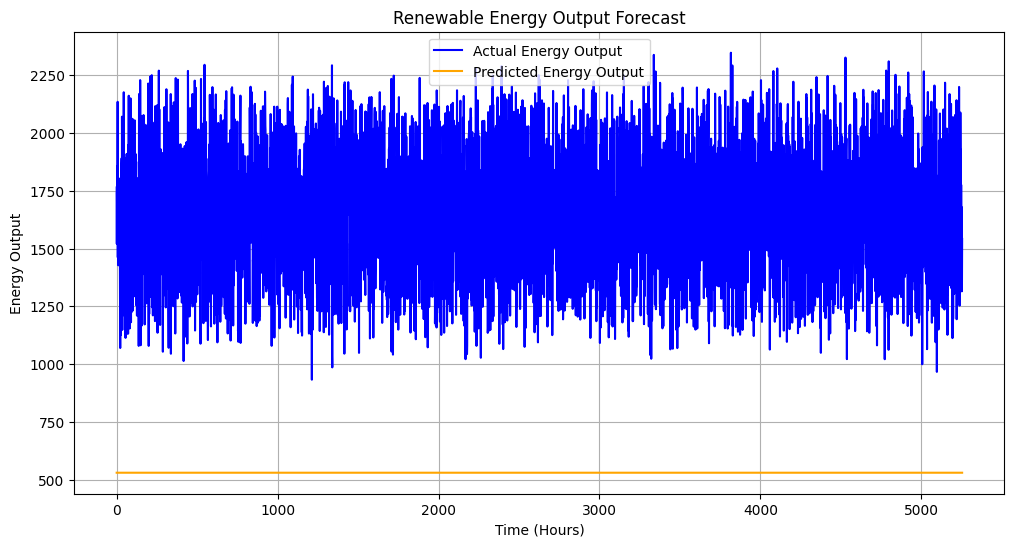

Balancing Energy Through Grid:
Columns in renewable energy dataset: Index(['wind_speed', 'temperature', 'sunlight', 'humidity', 'energy_output'], dtype='object')


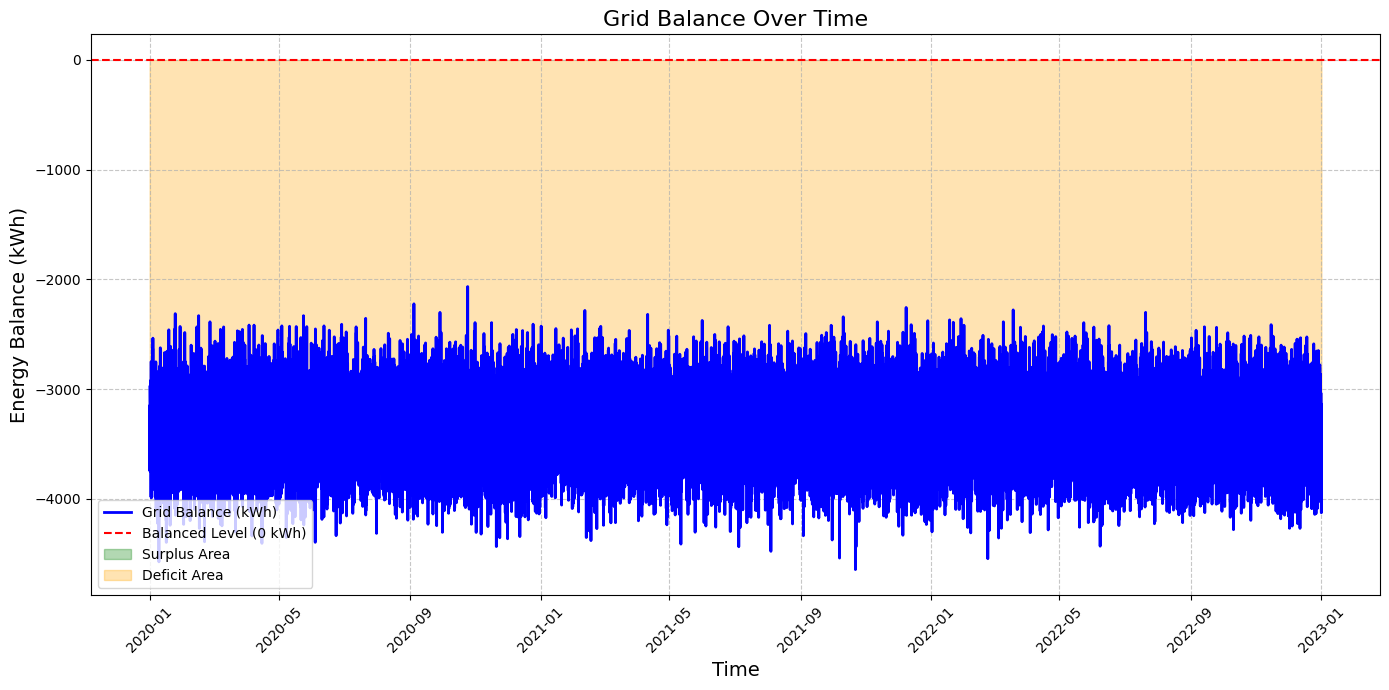

                   ds            y  wind_speed  temperature  sunlight  \
0 2020-01-01 00:00:00  5099.342831    9.363503    -8.409653  0.545376   
1 2020-01-01 01:00:00  4972.347140   23.767858     2.405465  0.133057   
2 2020-01-01 02:00:00  5129.537708   18.299849    34.481432  0.248272   
3 2020-01-01 03:00:00  5304.605971   14.966462     2.160313  0.906791   
4 2020-01-01 04:00:00  4953.169325    3.900466    19.866762  0.697118   

    humidity  energy_output  grid_balance   status  
0  97.274194    1473.862285  -3625.480546  Deficit  
1  87.661014    1822.951340  -3149.395800  Deficit  
2  71.992414    1735.891031  -3393.646677  Deficit  
3  43.278341    1923.734418  -3380.871554  Deficit  
4  21.452426    1498.853155  -3454.316170  Deficit  


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def balance_grid(energy_demand, renewable_energy):
    # Ensure the 'ds' column is in datetime format
    energy_demand['ds'] = pd.to_datetime(energy_demand['ds'])

    # Debugging line to check columns in renewable energy dataset
    print("Columns in renewable energy dataset:", renewable_energy.columns)

    # Merge datasets on timestamp
    grid_data = pd.merge(energy_demand, renewable_energy, left_on='ds', right_on='date')

    # Compute energy surplus or deficit
    grid_data['grid_balance'] = grid_data['energy_output'] - grid_data['y']

    # Determine action based on surplus/deficit
    grid_data['status'] = grid_data['grid_balance'].apply(lambda x: 'Surplus' if x > 0 else 'Deficit')

    # Plot Grid Balance
    plt.figure(figsize=(14, 7))
    plt.plot(grid_data['ds'], grid_data['grid_balance'], label="Grid Balance (kWh)", color='blue', linewidth=2)
    plt.axhline(y=0, color='red', linestyle='--', label="Balanced Level (0 kWh)")

    # Highlight surplus and deficit areas
    plt.fill_between(grid_data['ds'], grid_data['grid_balance'], 0, where=(grid_data['grid_balance'] > 0),
                     color='green', alpha=0.3, label='Surplus Area')
    plt.fill_between(grid_data['ds'], grid_data['grid_balance'], 0, where=(grid_data['grid_balance'] < 0),
                     color='orange', alpha=0.3, label='Deficit Area')

    # Adding grid, labels, and title
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Energy Balance (kWh)", fontsize=14)
    plt.title("Grid Balance Over Time", fontsize=16)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
    plt.show()

    return grid_data

# Modify main function to include grid balancing
def main():
    # Generate synthetic data
    energy_demand_data = generate_synthetic_energy_demand()
    renewable_energy_data = generate_synthetic_renewable_energy_output()

    # Forecast energy demand
    print("Forecasting Energy Demand:")
    forecast_energy_demand(energy_demand_data)

    # Forecast renewable energy output
    print("Forecasting Renewable Energy Output:")
    forecast_renewable_energy_output(renewable_energy_data)

    # Balance energy through the grid
    print("Balancing Energy Through Grid:")
    grid_status = balance_grid(energy_demand_data, renewable_energy_data)
    print(grid_status.head())

if __name__ == "__main__":
    main()